In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
#mnist.keys()

X, y = mnist["data"], mnist["target"]

c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


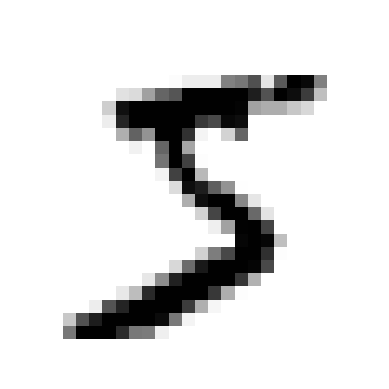

5


In [3]:
#Visualizing digit
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = X.iloc[0:1].values
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()
print(y[0])

In [4]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
#sgd_clf.predict(some_digit)


SGDClassifier(random_state=42)

In [16]:
import numpy as np
some_digit_scores = sgd_clf.decision_function(some_digit)
some_digit_scores
print(np.argmax(some_digit_scores))

print(sgd_clf.classes_)
print(sgd_clf.classes_[5])

5
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
5


c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

In [17]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5193,    2,   71,   17,   10,   34,   46,    4,  155,   28],
       [   3, 6121,   49,    9,   14,   17,   20,    8,   30,    6],
       [  42,  109, 4896,  113,   68,   21,   93,   86,  163,   19],
       [  37,   44,  361, 4312,   26,  497,   28,   86,  224,   93],
       [  15,   31,   49,    2, 5123,    8,   39,   38,   88,  136],
       [  57,   35,   65,  173,  111, 4069,  127,   36,  298,   69],
       [  56,   33,  204,    3,   66,  122, 4925,    4,   66,    1],
       [  24,   48,   77,   18,  133,   11,    3, 5225,   44,  207],
       [  47,  216,  705,  130,  133,  446,   77,   68, 3435,  211],
       [  25,   49,   28,   58,  606,   89,    0,  320,  107, 4256]],
      dtype=int64)

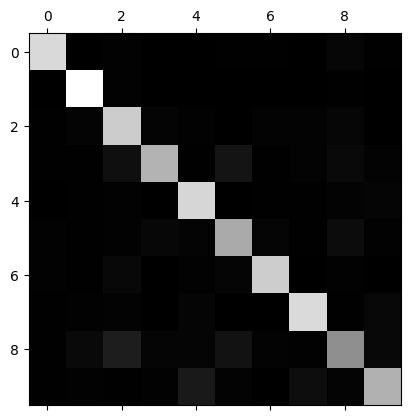

In [18]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()